### Analyze Spotify Data to identify popular artists,genres and tracks using Pandas and visualize the data using Matplotlib or Seaborn.

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
data=pd.read_csv(r'dataset.csv.csv')

In [105]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [106]:
data.tail()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,...,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,...,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,...,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,...,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music
113999,113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,...,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music


In [107]:
pd.isnull(data).sum() # to check null values in the Dataset.

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [108]:
data.info() # to check total number of rows,columns and datatypes in the Dataset.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Checking 10 least popular songs in the Dataset :-

In [109]:
least_popular=data.sort_values('popularity',ascending=True).head(10)
least_popular

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
56999,56999,4zJLkYcHGjWuf2Ui0eVAso,Håkan Hellström,LUGNA LÅTAR,Det kommer aldrig va över för mig,0,267106,False,0.554,0.877,...,-6.515,1,0.0469,0.01200,0.000039,0.4990,0.499,127.034,4,indie-pop
68346,68346,3bvSoEdHqhDv5jmIP0qfIo,Brray,Homecoming Latin Party,Bichotes Con Clase,0,193400,True,0.786,0.825,...,-5.191,0,0.2590,0.08720,0.003270,0.1470,0.752,180.026,4,latino
68347,68347,25WU3f3gv6ATdPtSG5cybu,Don Omar;Juan Magán,Perreo Tenebroso Vol. 4,No Sigue Modas Aka Ella No Sigue Modas,0,232000,False,0.685,0.862,...,-4.611,1,0.0627,0.00757,0.001400,0.0226,0.884,128.032,4,latino
19647,19647,0EBP3qfDpCZE2skX3PfbTf,Tracy Lawrence,Chillin' It - Mellow Day Country,Just You and Me,0,220133,False,0.585,0.340,...,-8.433,0,0.0243,0.76700,0.000004,0.2540,0.260,100.379,4,country
68361,68361,5Ct6xnkAQJ7lZXp7vHM8uF,Chris Jedi;Ozuna;Brytiago,Perreo Tenebroso Vol. 4,Bipolar,0,220080,False,0.782,0.697,...,-5.850,1,0.0618,0.32000,0.000000,0.1440,0.416,76.031,4,latino
19645,19645,5wW7fkOaNCKHM8NvEDf8Kh,Big & Rich;Bon Jovi,Chillin' It - Mellow Day Country,Born Again,0,234946,False,0.476,0.888,...,-4.926,1,0.0534,0.01310,0.000000,0.2770,0.617,162.000,4,country
19644,19644,3yz60wsJlg630mjAfU4qIv,Steve Earle,Good Times Country,Go Amanda,0,214720,False,0.326,0.716,...,-3.547,1,0.0306,0.00227,0.001710,0.1230,0.648,143.148,4,country
19643,19643,4BviPcJC1obuSn4sKkyRqG,Tracy Lawrence,Country Car Hits,Excitable Boy,0,176760,False,0.628,0.854,...,-7.045,1,0.0343,0.08270,0.023200,0.1530,0.922,151.551,4,country
19642,19642,1up0F8kK6mgObzqWi9Myom,Steve Earle,Finest Country,Jerusalem,0,236186,False,0.445,0.776,...,-4.492,1,0.0346,0.00252,0.007400,0.0981,0.403,118.379,4,country
19641,19641,4FQDsvQMu5ny7mY8ehv4vP,Sugarland,Christmas Country Songs 2022,Winter Wonderland,0,146973,False,0.587,0.876,...,-5.439,1,0.0432,0.12000,0.000000,0.0921,0.724,133.010,4,country


Checking descriptive statistics for the numerical variables that are present in the columns :-

In [110]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,114000.0,56999.500000,32909.109681,0.000,28499.75000,56999.500000,85499.2500,113999.000
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996


Checking 10 most popular songs which have popularity greater than 90 :-

In [111]:
most_popular=data.query('popularity>90',inplace=False).sort_values('popularity',ascending=False)
most_popular[:10]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
81051,81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
51664,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,...,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
81210,81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,pop
89411,89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggaeton
20008,20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,dance
88410,88410,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggae
30003,30003,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,edm
67356,67356,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,latin
68303,68303,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,latino


Checking the artist at the 18th row of the Dataset :-

In [112]:
data[["artists"]].iloc[18]  # index location method.

artists    Jason Mraz;Colbie Caillat
Name: 18, dtype: object

Converting duration of songs from milliseconds to seconds :-

In [113]:
data["duration"]= data["duration_ms"].apply(lambda x: round(x/1000))
data.drop("duration_ms", inplace=True, axis=1)

In [114]:
data.duration.head()

0    231
1    150
2    211
3    202
4    199
Name: duration, dtype: int64

Setting index to 'release_date' :-

In [115]:
data.set_index('track_name',inplace=True)

In [116]:
data

,Unnamed: 0,track_id,artists,album_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration
track_name,,,,,,,,,,,,,,,,,,,,
Comedy,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,73,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,231
Ghost - Acoustic,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),55,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,150
To Begin Again,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,57,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,211
Can't Help Falling In Love,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,71,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,202
Hold On,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,82,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sleep My Little Boy,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,21,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,385
Water Into Light,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,22,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,385
Miss Perfumado,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,22,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,271


### Visualization:-

In [117]:
sample_df = data.sample(int(0.004*len(data))) # calculating 0.4% of the total Dataset.

In [118]:
print(len(sample_df))

456


Box Plot :-

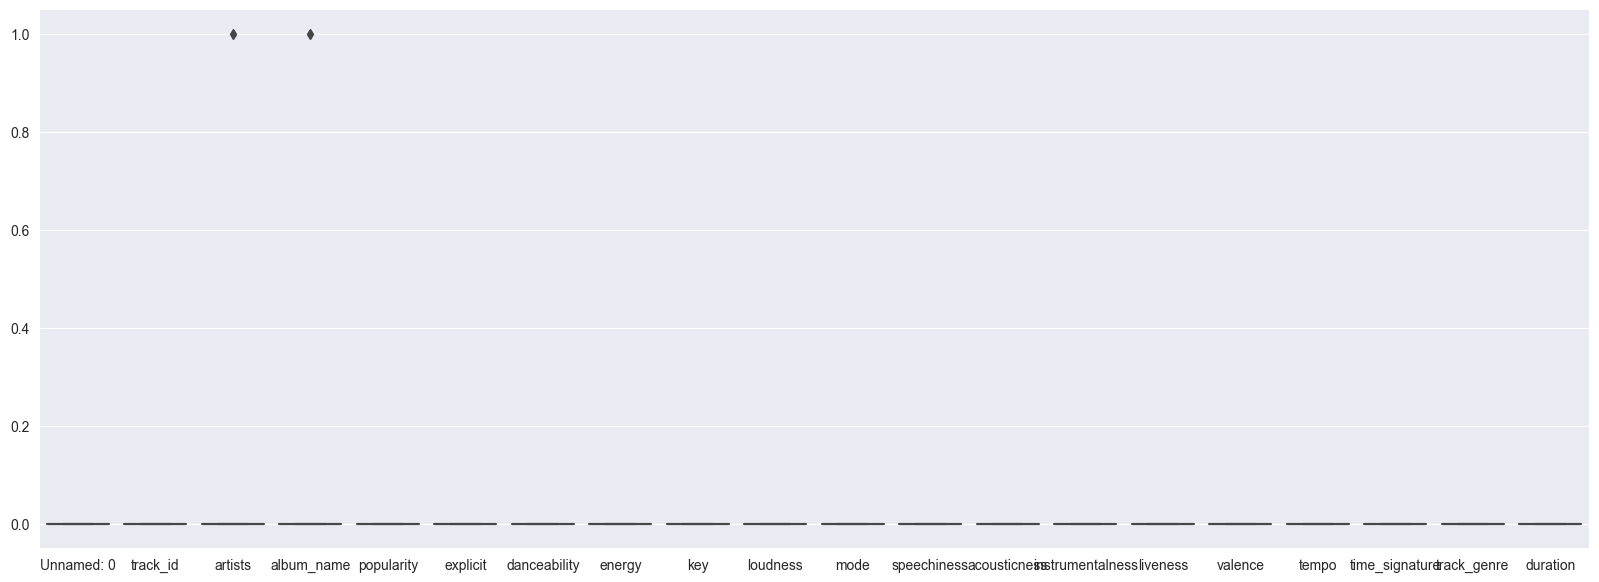

In [119]:
plt.figure(figsize=(20,7))
sns.boxplot(data.isnull())
plt.show()

Regression Plot :-

[Text(0.5, 1.0, 'Loudness vs Energy')]

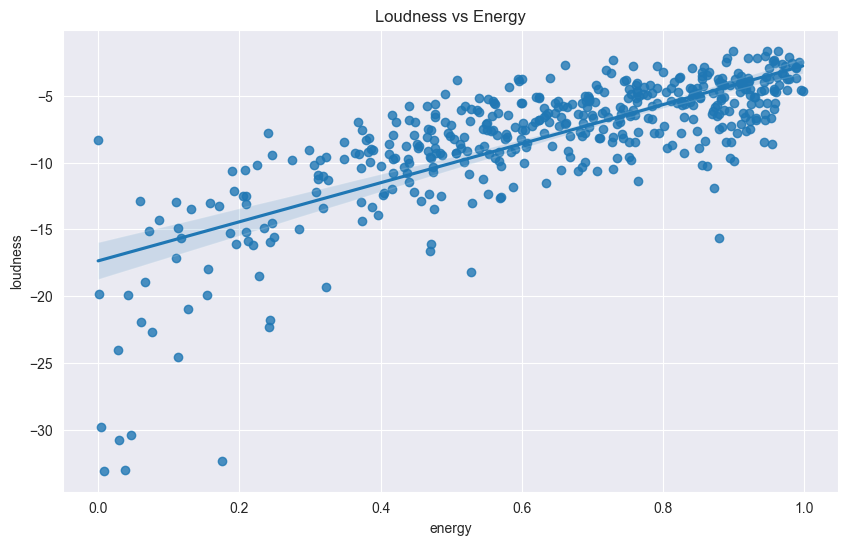

In [120]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample_df, y= "loudness", x = "energy").set(title="Loudness vs Energy")

[Text(0.5, 1.0, 'Popularity vs Acousticness')]

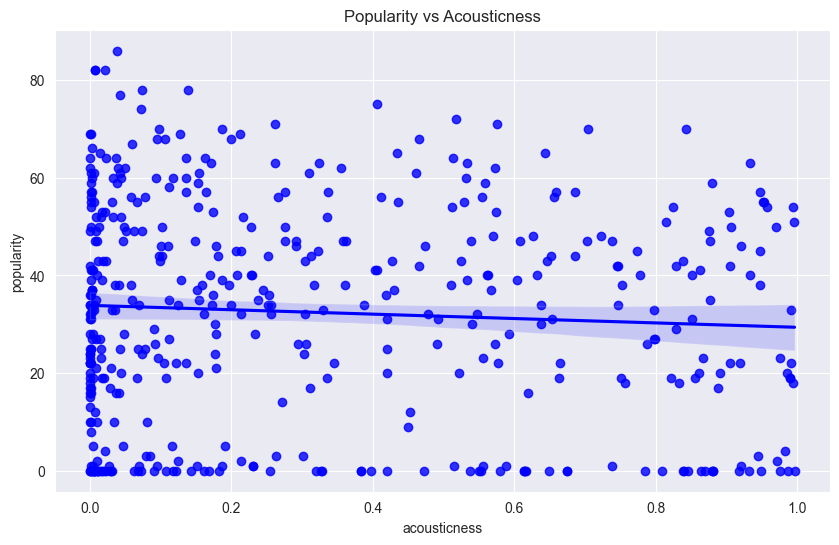

In [121]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample_df, y= "popularity", x = "acousticness", color = "b").set(title="Popularity vs Acousticness")

In [122]:
df_genre = pd.read_csv(r'dataset.csv.csv')

In [123]:
df_genre.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Bar Plot :-

NameError: name 'track_genre' is not defined

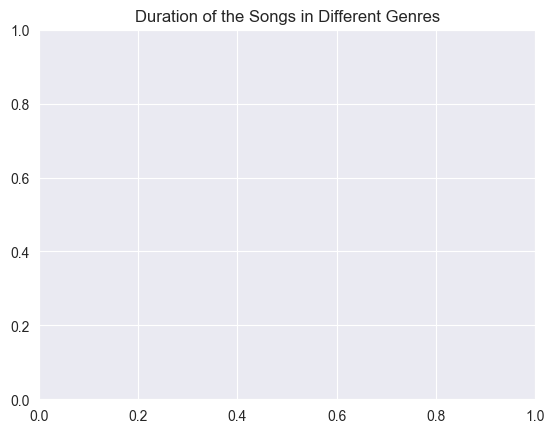

In [124]:
plt.title("Duration of the Songs in Different Genres")
sns.color_palette("rocket", as_cmap= True)
sns.barplot (y='track_id', x='duration_ms', data=track_genre)
plt.xlabel("Duration in milli seconds")
plt.ylabel("track")

In [ ]:
sns.set_style(style = "darkgrid")
plt.figure(figsize=(10,5))
famous=df_genre.sort_values("popularity", ascending = False).head(10)
sns.barplot(y= 'genre', x='popularity', data = famous).set(title= "Top 5 Genres by Popularity")

ValueError: Could not interpret input 'genre'

<Figure size 1000x500 with 0 Axes>

Scatter Plot :-

<Axes: xlabel='energy', ylabel='loudness'>

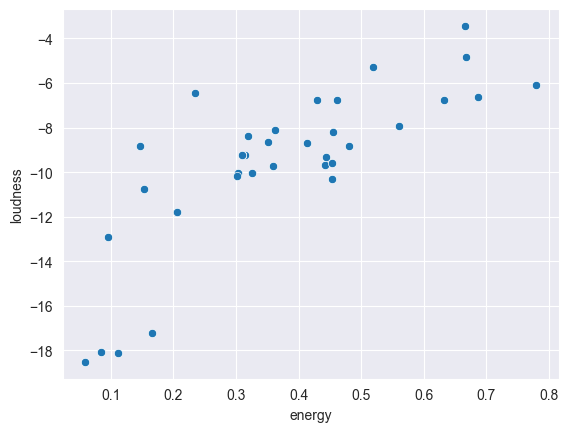

In [ ]:
sns.scatterplot(x='energy',y='loudness',data=df_genre.head(50))

<Axes: xlabel='valence', ylabel='liveness'>

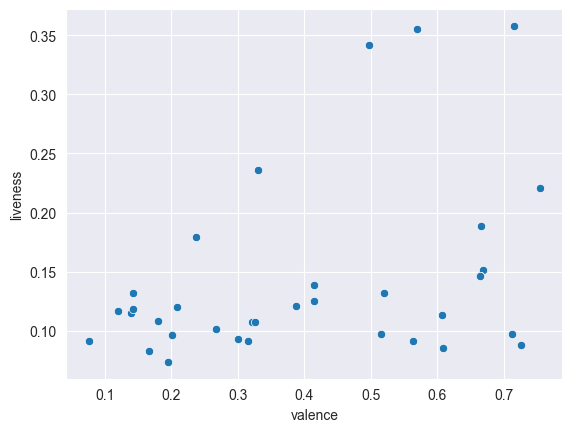

In [ ]:
sns.scatterplot(x='valence',y='liveness',data=df_genre.head(50))

Multi Plot :-

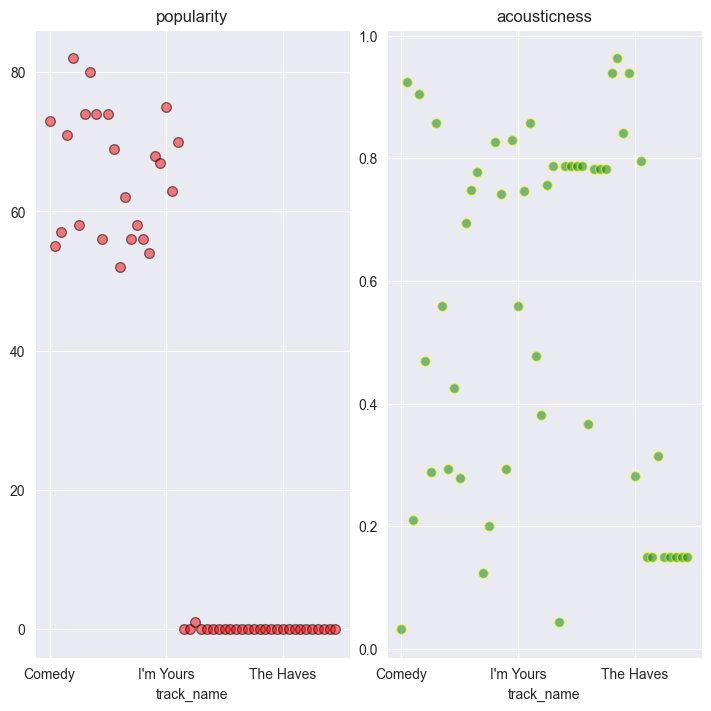

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(15,4),constrained_layout = True)
data.head(50)['popularity'].plot(linestyle = '',
                               marker='o',
                               markersize = 7,
                               alpha = 0.5,
                               figsize = (7,7),
                               markerfacecolor = 'red',
                               ax=axs[0],
                               title='popularity',
                               markeredgecolor = 'black')
data.head(50)['acousticness'].plot(linestyle = '',
                               marker='o',
                               markersize = 7,
                               alpha = 0.5,
                               figsize = (7,7),
                               ax=axs[1],
                               title='acousticness',
                               markerfacecolor = 'green',
                               markeredgecolor = 'yellow')

plt.show()

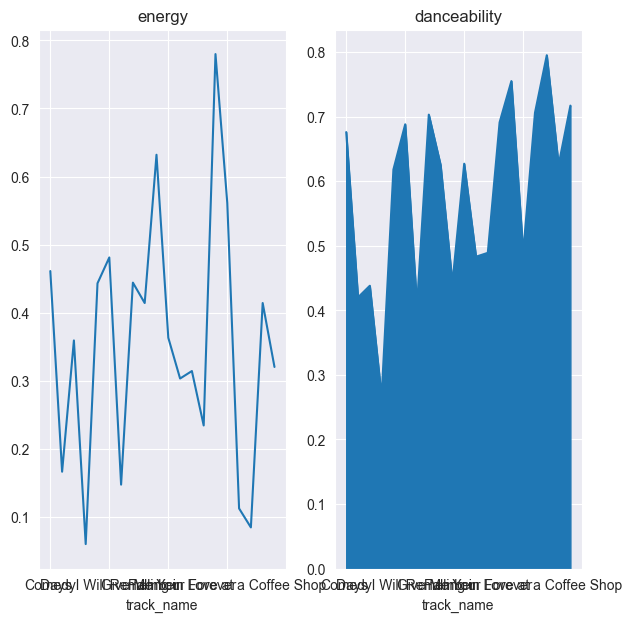

In [ ]:
fig,axs = plt.subplots(1,2)
data.head(20)['energy'].plot(
                               
                               kind='line',
                               
                               
                               figsize = (7,7),
                               
                               ax=axs[0],
                               title='energy',
                               )
data.head(20)['danceability'].plot(
                              kind='area'    ,   
                              figsize = (7,7),
                              ax=axs[1],
                              title='danceability',
                                              )

plt.show()

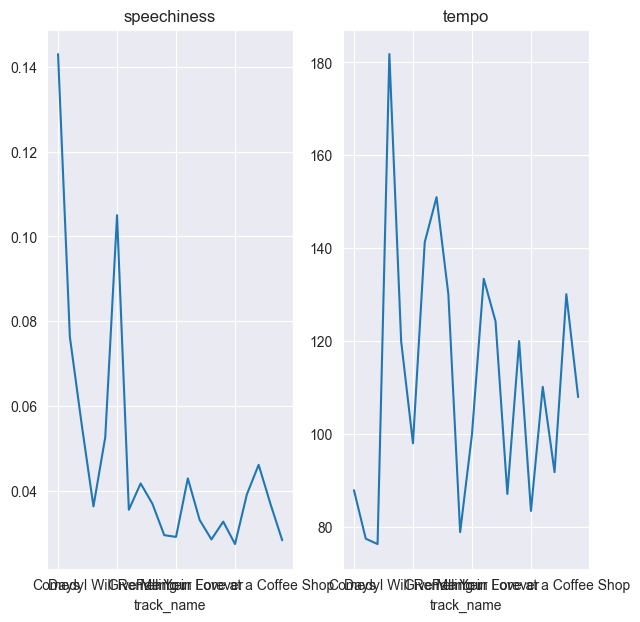

In [ ]:
fig,axs = plt.subplots(1,2)
data.head(20)['speechiness'].plot(
                               
                               kind='line',
                               
                               
                               figsize = (7,7),
                               
                               ax=axs[0],
                               title='speechiness',
                               )
data.head(20)['tempo'].plot(
                              kind='line'    ,   
                              figsize = (7,7),
                              ax=axs[1],
                              title='tempo',
                                              )

plt.show()

In [ ]:
df_genre

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [ ]:
df_genre.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [ ]:
df_genre.groupby('album_name')['popularity'].mean().sort_values(ascending=False)

album_name
Unholy (feat. Kim Petras)                                              100.0
Quevedo: Bzrp Music Sessions, Vol. 52                                   99.0
La Bachata                                                              98.0
Indigo (Extended)                                                       96.0
I Ain’t Worried (Music From The Motion Picture "Top Gun: Maverick")     96.0
                                                                       ...  
Notes from the Dark, Vol. 22                                             0.0
Chill Trax, Vol. 7                                                       0.0
Chill Out Mood, Vol. 4                                                   0.0
Chill Out Days, Vol. 4                                                   0.0
Alle Jahre wieder: Weihnachten mit Kindern                               0.0
Name: popularity, Length: 46589, dtype: float64

In [ ]:
artist ='Gen Hoshino'
df_genre[df_genre['album_name'] == artist]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


Line Plot :-

<Axes: xlabel='album_name', ylabel='popularity'>

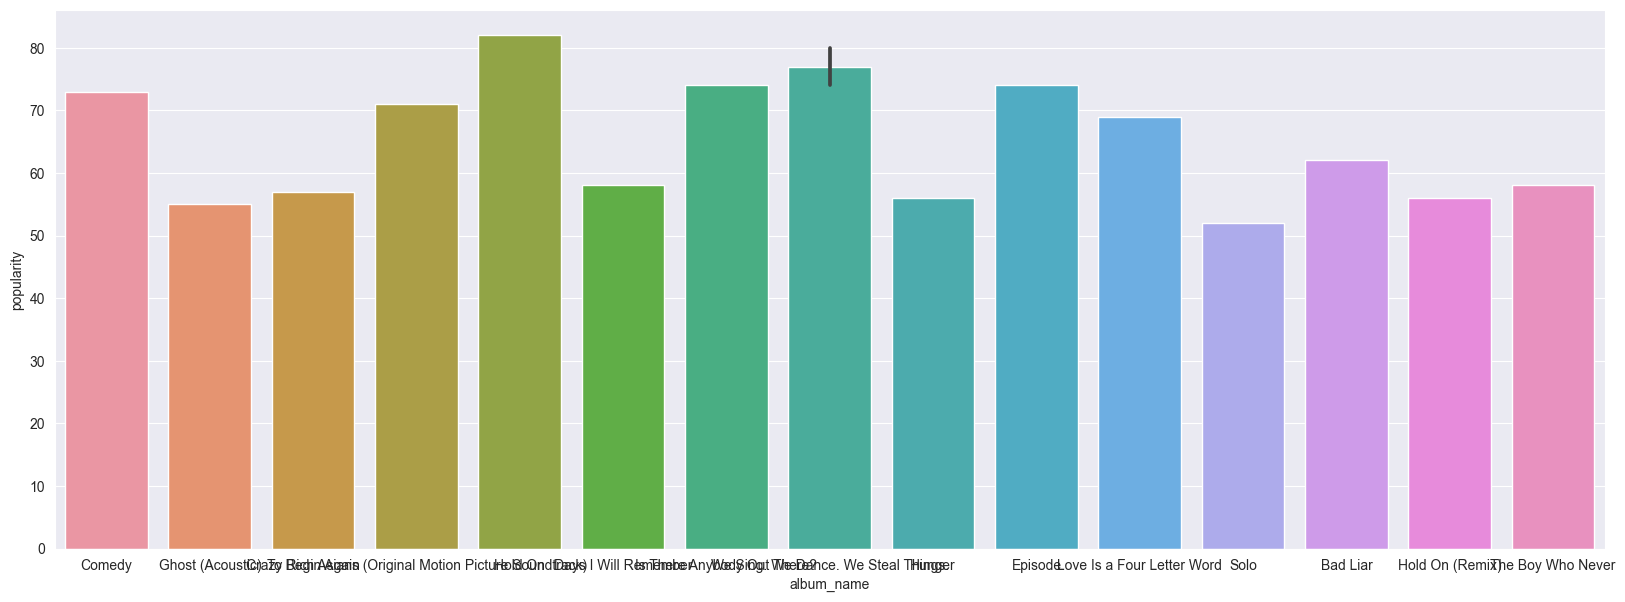

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(x='album_name',y='popularity',data=df_genre.head(16))

<Axes: xlabel='key', ylabel='tempo'>

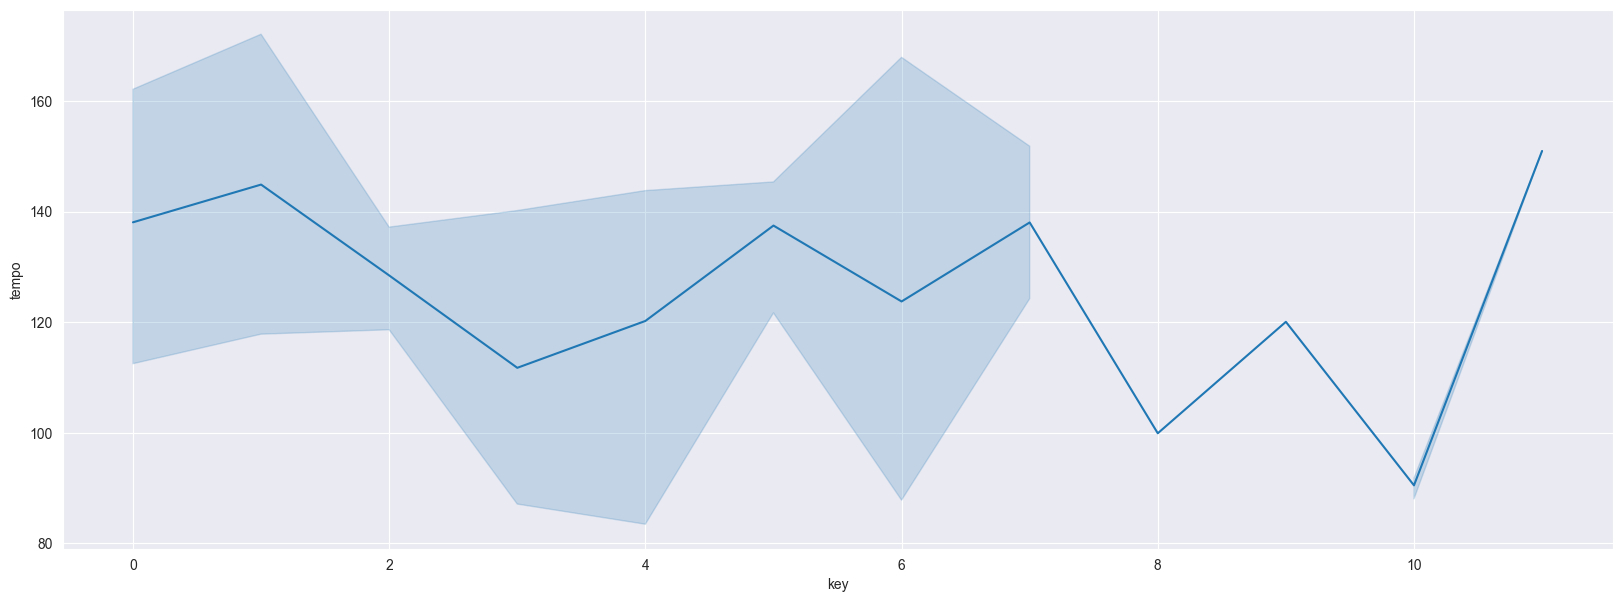

In [ ]:
plt.figure(figsize=(20,7))
sns.lineplot(x='key',y='tempo',data=df_genre.head(50))